# 機械学習入門授業前課題1 アヤメの分類

### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


- virgicolorとvirginica
- sepal_lengthとpetal_length

《実際の問題では？》


実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

学習とは→ニューラルネットワークの各層の重みを少しずつ調整し、正解ラベルとの誤差を小さくする事を、ディープラーニングでは「学習」と呼ぶ。

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris

In [192]:
iris = load_iris()
print(type(iris))
print(iris)

<class 'sklearn.utils.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
    

In [193]:
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns = ['Species'])

iris_df = pd.concat([X,y], axis =1)

print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [194]:
# sepal_lengthとpetal_lengthを抜き出す
iris_df1 =iris_df.loc[50:, ['sepal_length','petal_length', 'Species']]

print(iris_df1)
print(type(iris_df1))

     sepal_length  petal_length  Species
50            7.0           4.7        1
51            6.4           4.5        1
52            6.9           4.9        1
53            5.5           4.0        1
54            6.5           4.6        1
..            ...           ...      ...
145           6.7           5.2        2
146           6.3           5.0        2
147           6.5           5.2        2
148           6.2           5.4        2
149           5.9           5.1        2

[100 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。


**《実際の問題では？》**


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。  →1と2に対しての配置の傾向に大きな変化が見受けられないから？

**前処理**

データに加工をしていきます。→用意した”生”のデータを、アルゴリズムが学習できる、あるいは学習しやすいように”きれいな”データに整える、といったようなイメージ　https://avinton.com/blog/2018/01/data-processing/

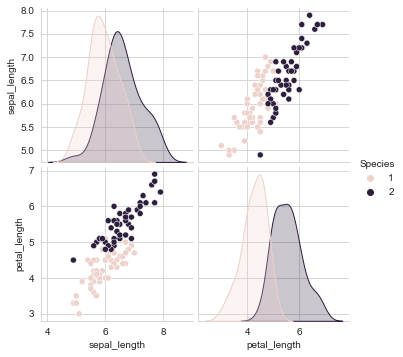

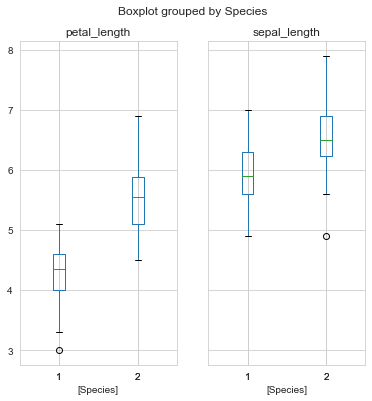

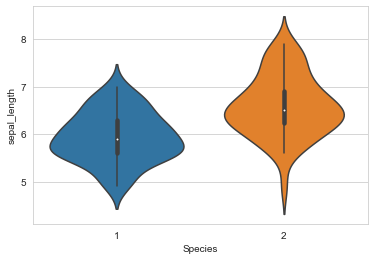

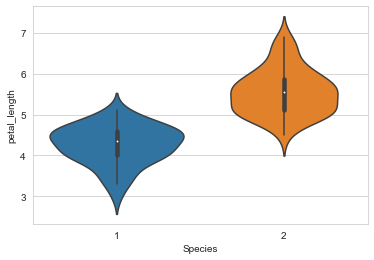

In [195]:
#散布図 何で散布図をみると分類が難しそうと思うのか
sns.pairplot(iris_df1, hue='Species')

#箱ひげ図
iris_df1.boxplot(by='Species', figsize=(6,6));
plt.show();

#バイオリン図
sns.violinplot(x=iris_df1['Species'] ,y = iris_df1['sepal_length'])
plt.show()
sns.violinplot(x=iris_df1['Species'] ,y = iris_df1['petal_length'])
plt.show()

### 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [196]:
from sklearn.model_selection import train_test_split

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [283]:
#訓練データと検証データで分ける
# https://note.nkmk.me/python-pandas-at-iat-loc-iloc/ 
#pandasで任意の位置の値を取得・変更するat, iat, loc, iloc

X_train, X_test, y_train, y_test = train_test_split(np.array(iris_df1.iloc[:, [0, 1]]), 
                                                    np.array(iris_df1.iloc[:,[2]]), train_size = 0.75, random_state = 0)

### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


**《注意点》**


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。


**《実際の問題での前処理は？》**


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [198]:
from sklearn.preprocessing import StandardScaler

https://yomukika.com/blog_word_030.html

標準得点を求めるプロセスのことを標準化と呼びます。標準化のなかでも最も基本的なものは平均値が0、標準偏差が1となるような標準得点に変換するものです。平均値が0、標準偏差が1となる標準得点は、まずもとの変数から平均値を差し引き、そしてそれを標準偏差で割ることで得られます。このプロセスを変数の分布の視点で考えると、もとの変数の分布の中心を0となるようにずらしたうえで、分布の広がり（ばらつき）のクセを補正するようなイメージになります。なお、この変換で得られる標準得点（もとの変数から平均値を差し引いた値 ÷ 標準偏差）のことをz得点（z-score）と呼びます。

In [199]:
#標準化は訓練用のデータでfitを行い、訓練用のデータにtransformを行う
#https://mathwords.net/fittransform
#fit、transform、fit_transformの意味を、正規化の例で解説

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

#検証用のデータにtransformを行います。
X_test_std = sc.transform(X_test)

### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [200]:
from sklearn.neighbors import KNeighborsClassifier
# https://qiita.com/fujin/items/128ed7188f7e7df74f2c

knc = KNeighborsClassifier()
knc.fit(X_std,  y_train)
Y_pred = knc.predict(X_test_std)

<ipython-input-200-c04f0362e14d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knc.fit(X_std,  y_train)


### 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には **Accuracy（正解率）**、**Precision（適合率）**、**Recall（再現率）**、**F値** があります。それぞれの意味を理解するには、 **混同行列（confusion matrix）** を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation


sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation


sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation


sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation


sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation

### scikit-learnを使い4種類の指標を計算する

In [286]:
#https://pythondatascience.plavox.info/scikit-learn/%E5%88%86%E9%A1%9E%E7%B5%90%E6%9E%9C%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1
#scikit-learn でクラス分類結果を評価する

In [285]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)

0.88

In [287]:
from sklearn.metrics import precision_score
precision_score(y_test, Y_pred)

1.0

In [288]:
from sklearn.metrics import recall_score
recall_score(y_test, Y_pred)

0.7692307692307693

In [289]:
from sklearn.metrics import f1_score
f1_score(y_test, Y_pred)

0.8695652173913044

### 混同行列をscikit-learnを使い表示する

In [290]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[10,  3],
       [ 0, 12]])

### 4種類の指標値の意味について簡単に調査して文章でまとめる

 - Accuracy（正解率）
 
→全体のデータの中で正しく分類できたTP とTNがどれだけあるかという指標。高いほど性能が良い。
 
 Accuracy=(TP+TN)　/ (TP+FP+FN+TN)
 
 
 - Precision（適合率）

→Positive と分類されたデータ(TP + FP)の中で実際にPositiveだったデータ(TP)数の割合。この値が高いほど性能が良く、間違った分類が少ないということを意味する。

Presision=TP / (TP+FP)
 
 
 - Recall（再現率）
 
→取りこぼし無くPositive なデータを正しくPositiveと推測できているかどうか。この値が高いほど性能がよく、間違ったPositiveの判断が少ないということ。別の言い方をすれば本来Positiveと推測すべき全データの内、どれほど回収できたかという指標。

Recall=TP / (TP+FN)
 
 
 - F値
 
→取りこぼし無くNegative なデータを正しくNegativeと推測できているかどうか。この値が高いほど性能がよく、間違ったNegativeの判断が少ないということ。別の言い方をすれば本来Negativeと推測すべき全データの内、どれほど回収できたかという指標。

True Negative Rate=TN / (FP+TN)


- 混同行列

→https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f

### 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

3-nnの決定領域を表示した例が以下です。

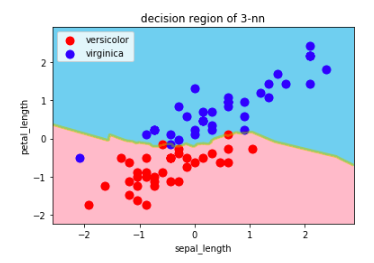

この例では訓練データをプロットし、どのように学習したかを見ています。一方で、検証データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。


**手法の改善**

実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません。



In [263]:
#ここでy_trainをリシェイプして、ndarrayの形にしておかないと可視化が出来ない
y_train = y_train.reshape(-1)
y_train.shape

(75,)

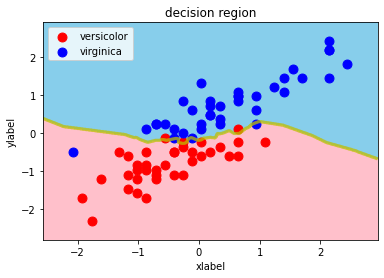

In [154]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std, y_train, knc)

### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVC — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation

**《実際の問題では？》**


ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。




In [264]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(np.array(iris_df1.iloc[:, [0, 1]]), 
                                                    np.array(iris_df1.iloc[:,[2]]), train_size = 0.75, random_state = 0)


In [265]:
sc1 = StandardScaler()
X_std1 = sc1.fit_transform(X_train1)

#検証用のデータにtransformを行います。
X_test_std1 = sc1.transform(X_test1)

In [267]:
y_train1 = y_train1.reshape(-1)

accuracy = 0.88
precision = 1.0
recall = 0.7692307692307693
f1 score = 0.8695652173913044
confusion matrix = 
[[10  3]
 [ 0 12]]


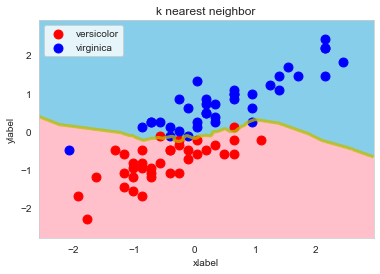

In [268]:
# 最近傍法
# https://qiita.com/fujin/items/128ed7188f7e7df74f2c

from sklearn.neighbors import KNeighborsClassifier
knc1 = KNeighborsClassifier()

#学習
knc1.fit(X_std1, y_train1)
#推定
Y_pred1 = knc1.predict(X_test_std1)

#評価
print('accuracy = {}'.format(accuracy_score(y_test1, Y_pred1)))
print('precision = {}'.format(precision_score(y_test1, Y_pred1)))
print('recall = {}'.format(recall_score(y_test1, Y_pred1)))
print('f1 score = {}'.format(f1_score(y_test1, Y_pred1)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test1, Y_pred1)))

#可視化
def decision_region(X, y, model, step=0.01, title='k nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std1, y_train1,  knc1)

accuracy = 0.92
precision = 1.0
recall = 0.8461538461538461
f1 score = 0.9166666666666666
confusion matrix = 
[[11  2]
 [ 0 12]]


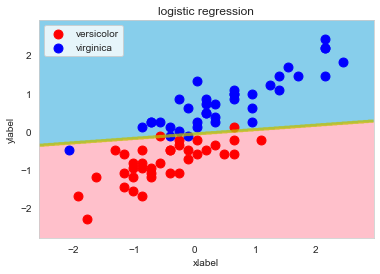

In [271]:
# ロジスティック回帰
#https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_std1, y_train1)
Y_pred2 = lr1.predict(X_test_std1)

print('accuracy = {}'.format(accuracy_score(y_test1, Y_pred2)))
print('precision = {}'.format(precision_score(y_test1, Y_pred2)))
print('recall = {}'.format(recall_score(y_test1, Y_pred2)))
print('f1 score = {}'.format(f1_score(y_test1, Y_pred2)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test1, Y_pred2)))

def decision_region(X, y, model, step=0.01, title='logistic regression', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_std1, y_train1,  lr1)

accuracy = 0.92
precision = 1.0
recall = 0.8461538461538461
f1 score = 0.9166666666666666
confusion matrix = 
[[11  2]
 [ 0 12]]


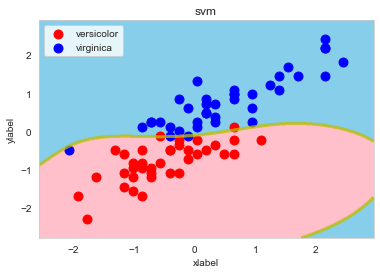

In [272]:
#SVM
#https://qiita.com/MuAuan/items/355e0357437d1ce6184d

from sklearn.svm import SVC

svc1 = SVC()
svc1.fit(X_std1, y_train1)
Y_pred3 = svc1.predict(X_test_std1)

print('accuracy = {}'.format(accuracy_score(y_test1, Y_pred3)))
print('precision = {}'.format(precision_score(y_test1, Y_pred3)))
print('recall = {}'.format(recall_score(y_test1, Y_pred3)))
print('f1 score = {}'.format(f1_score(y_test1, Y_pred3)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test1, Y_pred3)))

def decision_region(X, y, model, step=0.01, title='svm', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_std1, y_train1, svc1)

accuracy = 0.88
precision = 1.0
recall = 0.7692307692307693
f1 score = 0.8695652173913044
confusion matrix = 
[[10  3]
 [ 0 12]]


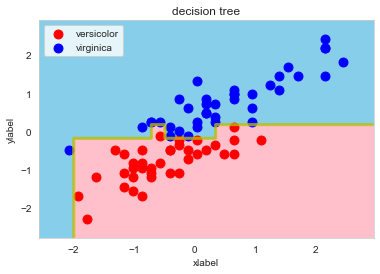

In [273]:
#決定木
#https://qiita.com/3000manJPY/items/ef7495960f472ec14377

from sklearn import tree

tree1 = tree.DecisionTreeClassifier()
tree1.fit(X_std1, y_train1)
Y_pred4 = tree1.predict(X_test_std1)

print('accuracy = {}'.format(accuracy_score(y_test1, Y_pred4)))
print('precision = {}'.format(precision_score(y_test1, Y_pred4)))
print('recall = {}'.format(recall_score(y_test1, Y_pred4)))
print('f1 score = {}'.format(f1_score(y_test1, Y_pred4)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test1, Y_pred4)))

def decision_region(X, y, model, step=0.01, title='decision tree', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_std1, y_train1, tree1)

accuracy = 0.88
precision = 1.0
recall = 0.7692307692307693
f1 score = 0.8695652173913044
confusion matrix = 
[[10  3]
 [ 0 12]]


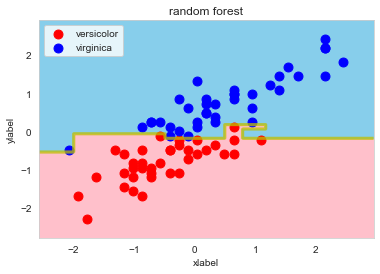

In [274]:
#ランダムフォレスト

from sklearn.ensemble import RandomForestClassifier as RFC

rfc1 = RFC()
rfc1.fit(X_std1, y_train1)
Y_pred5 = rfc1.predict(X_test_std1)

print('accuracy = {}'.format(accuracy_score(y_test1, Y_pred5)))
print('precision = {}'.format(precision_score(y_test1, Y_pred5)))
print('recall = {}'.format(recall_score(y_test1, Y_pred5)))
print('f1 score = {}'.format(f1_score(y_test1, Y_pred5)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test1, Y_pred5)))

def decision_region(X, y, model, step=0.01, title='random forest', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_std1, y_train1, rfc1)

### 指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

In [164]:
list = [
[0.88, 1.0, 0.769,0.869], 
[0.92, 1.0, 0.846,0.916],  
[0.92, 1.0, 0.846,0.916], 
[0.88, 1.0, 0.769,0.869], 
[0.88, 1.0, 0.769,0.869]]
df = pd.DataFrame(list)
df.index = ['最近傍法','ロジスティック回帰','SVM','決定木','ランダムフォレスト']
df.columns = ['Accuracy(正解率)','Precision(適合率)','Recall(再現率)','F値']
df

,Accuracy(正解率),Precision(適合率),Recall(再現率),F値
最近傍法,0.88,1.0,0.769,0.869
ロジスティック回帰,0.92,1.0,0.846,0.916
SVM,0.92,1.0,0.846,0.916
決定木,0.88,1.0,0.769,0.869
ランダムフォレスト,0.88,1.0,0.769,0.869


- 手法によって良い結果が出た指標値

→ロジスティック回帰とSVMがRecall値とF値に関して他の学習モデルより良い値を叩き出している。


- どういった決定領域になったか

**最近傍法**→外れ値には影響されず、線がゆらいで細かく分類しているように見られる。

**ロジスティック回帰**→直線で引かれており、分かりやすい。しかし、少しずつ分類はずれていそう。

**SVM**→曲線で引かれており、外れ値にも影響を受け過学習しているように見られる。

**決定木**→直線で引かれており、外れ値にも影響を受け過学習しているように見られる。

**ランダムフォレスト**→直線で引かれ細かく分類しているように見られる。

### 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [275]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(np.array(iris_df1.iloc[:, [0, 1]]), 
                                                    np.array(iris_df1.iloc[:,[2]]), train_size = 0.75, random_state = 0)


In [276]:
y_train2 = y_train2.reshape(-1)

accuracy = 0.92
precision = 1.0
recall = 0.8461538461538461
f1 score = 0.9166666666666666
confusion matrix = 
[[11  2]
 [ 0 12]]


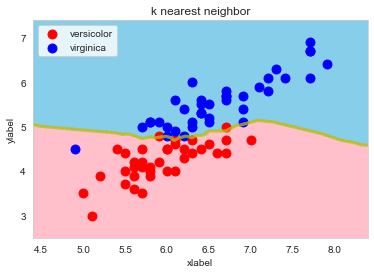

In [277]:
# 最近傍法
# https://qiita.com/fujin/items/128ed7188f7e7df74f2c

from sklearn.neighbors import KNeighborsClassifier
knc2 = KNeighborsClassifier()

#学習
knc2.fit(X_train2, y_train2)
#推定
y_pred1 = knc2.predict(X_test2)

#評価
print('accuracy = {}'.format(accuracy_score(y_test2, y_pred1)))
print('precision = {}'.format(precision_score(y_test2, y_pred1)))
print('recall = {}'.format(recall_score(y_test2, y_pred1)))
print('f1 score = {}'.format(f1_score(y_test2, y_pred1)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test2, y_pred1)))

#可視化
def decision_region(X, y, model, step=0.01, title='k nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train2 , y_train2,  knc2)

accuracy = 0.88
precision = 1.0
recall = 0.7692307692307693
f1 score = 0.8695652173913044
confusion matrix = 
[[10  3]
 [ 0 12]]


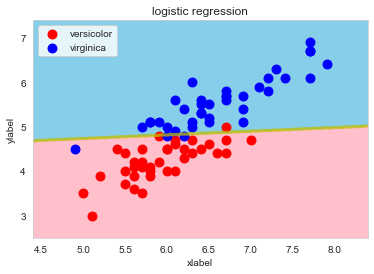

In [278]:
# ロジスティック回帰
#https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)
y_pred2 = lr2.predict(X_test2)

print('accuracy = {}'.format(accuracy_score(y_test2, y_pred2)))
print('precision = {}'.format(precision_score(y_test2, y_pred2)))
print('recall = {}'.format(recall_score(y_test2, y_pred2)))
print('f1 score = {}'.format(f1_score(y_test2, y_pred2)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test2, y_pred2)))

def decision_region(X, y, model, step=0.01, title='logistic regression', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train2, y_train2,  lr2)

accuracy = 0.92
precision = 1.0
recall = 0.8461538461538461
f1 score = 0.9166666666666666
confusion matrix = 
[[11  2]
 [ 0 12]]


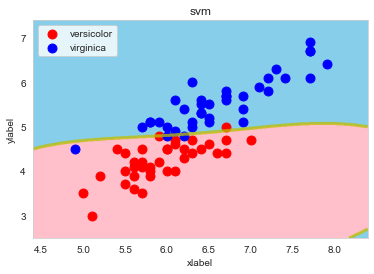

In [279]:
#SVM
#https://qiita.com/MuAuan/items/355e0357437d1ce6184d

from sklearn.svm import SVC

svc2 = SVC()
svc2.fit(X_train2, y_train2)
y_pred3 = svc2.predict(X_test2)

print('accuracy = {}'.format(accuracy_score(y_test2, y_pred3)))
print('precision = {}'.format(precision_score(y_test2, y_pred3)))
print('recall = {}'.format(recall_score(y_test2, y_pred3)))
print('f1 score = {}'.format(f1_score(y_test2, y_pred3)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test2, y_pred3)))

def decision_region(X, y, model, step=0.01, title='svm', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train2, y_train2, svc2)

accuracy = 0.88
precision = 1.0
recall = 0.7692307692307693
f1 score = 0.8695652173913044
confusion matrix = 
[[10  3]
 [ 0 12]]


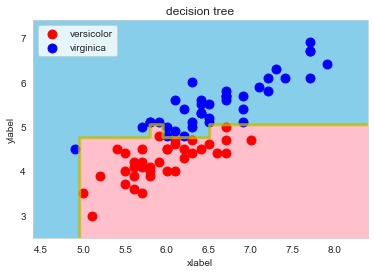

In [280]:
#決定木
#https://qiita.com/3000manJPY/items/ef7495960f472ec14377

from sklearn import tree

tree2 = tree.DecisionTreeClassifier()
tree2.fit(X_train2, y_train2)
y_pred4 = tree2.predict(X_test2)

print('accuracy = {}'.format(accuracy_score(y_test2, y_pred4)))
print('precision = {}'.format(precision_score(y_test2, y_pred4)))
print('recall = {}'.format(recall_score(y_test2, y_pred4)))
print('f1 score = {}'.format(f1_score(y_test2, y_pred4)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test2, y_pred4)))

def decision_region(X, y, model, step=0.01, title='decision tree', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train2, y_train2, tree2)

accuracy = 0.84
precision = 1.0
recall = 0.6923076923076923
f1 score = 0.8181818181818181
confusion matrix = 
[[ 9  4]
 [ 0 12]]


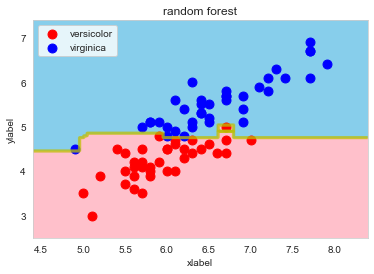

In [281]:
#ランダムフォレスト

from sklearn.ensemble import RandomForestClassifier as RFC

rfc2 = RFC()
rfc2.fit(X_train2, y_train2)
y_pred5 = rfc2.predict(X_test2)

print('accuracy = {}'.format(accuracy_score(y_test2, y_pred5)))
print('precision = {}'.format(precision_score(y_test2, y_pred5)))
print('recall = {}'.format(recall_score(y_test2, y_pred5)))
print('f1 score = {}'.format(f1_score(y_test2, y_pred5)))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test2, y_pred5)))

def decision_region(X, y, model, step=0.01, title='random forest', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train2, y_train2, rfc2)

In [178]:
list = [
[0.88, 1.0, 0.769,0.869],
[0.92, 1.0, 0.846, 0.916],
[0.92, 1.0, 0.846,0.916],
[0.88, 1.0, 0.769, 0.869],
[0.92, 1.0, 0.846,0.916],
[0.92, 1.0, 0.846, 0.916],
[0.88, 1.0, 0.769,0.869],
[0.84, 0.90, 0.769, 0.833],
[0.88, 1.0, 0.769,0.869],
[0.84, 1.0, 0.692, 0.818]]
df = pd.DataFrame(list)
df.index = ['最近傍法','最近傍法(sc無し)','ロジスティック回帰','ロジスティック回帰(sc無し)','SVM'
                   ,'SVM(sc無し)','決定木','決定木(sc無し)','ランダムフォレスト','ランダムフォレスト(sc無し)']
df.columns = ['Accuracy(正解率)','Precision(適合率)','Recall(再現率)','F値']
df

,Accuracy(正解率),Precision(適合率),Recall(再現率),F値
最近傍法,0.88,1.0,0.769,0.869
最近傍法(sc無し),0.92,1.0,0.846,0.916
ロジスティック回帰,0.92,1.0,0.846,0.916
ロジスティック回帰(sc無し),0.88,1.0,0.769,0.869
SVM,0.92,1.0,0.846,0.916
SVM(sc無し),0.92,1.0,0.846,0.916
決定木,0.88,1.0,0.769,0.869
決定木(sc無し),0.84,0.9,0.769,0.833
ランダムフォレスト,0.88,1.0,0.769,0.869
ランダムフォレスト(sc無し),0.84,1.0,0.692,0.818


- 標準化後と標準化を行わなかった、指標値と決定領域の変化

**最近傍法**→標準化を行わない場合に正解率とF値が向上しており、決定領域にも変化無し

**ロジスティック回帰**→標準化を行わない場合正解率、再現率、F値が軒並み減少している。決定領域変化無し。

**SVM**→標準化を行わない場合、指標値には変化が無いが、決定領域を見ると、過学習をより行ってしまっており、標準化をせずに値が大きいままの為に起こったと考えられる。

**決定木**→標準化を行わない場合、正解率とF値が減少しており、決定領域に関してはSVMと同じことが起こっている。

**ランダムフォレスト**→標準化を行わない場合、指標値に関してはロジスティック回帰以上に減少している。決定領域は変化無し。

### 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。


決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。

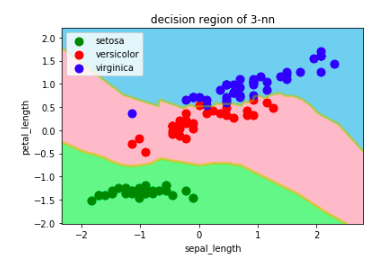

ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


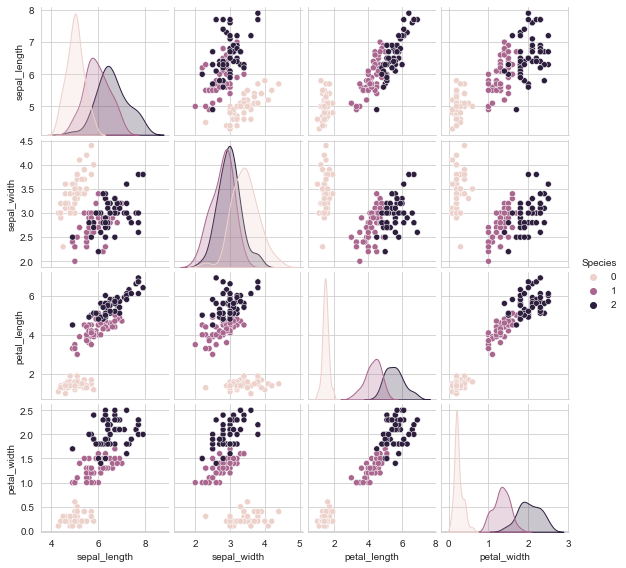

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


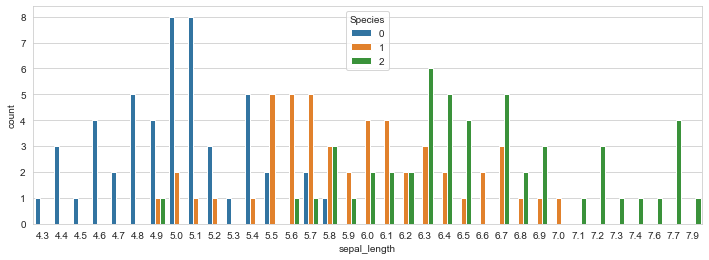

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


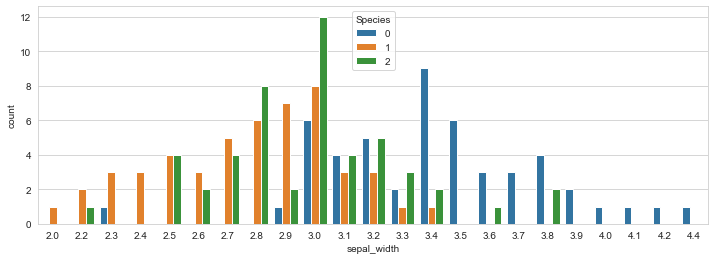

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


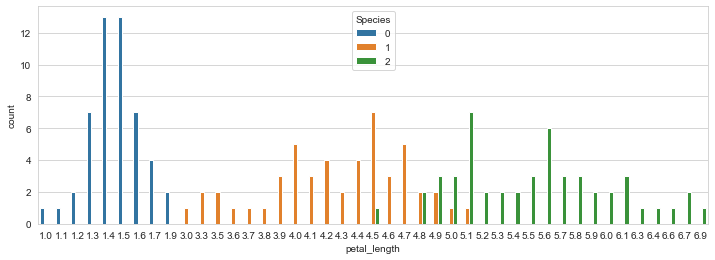

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


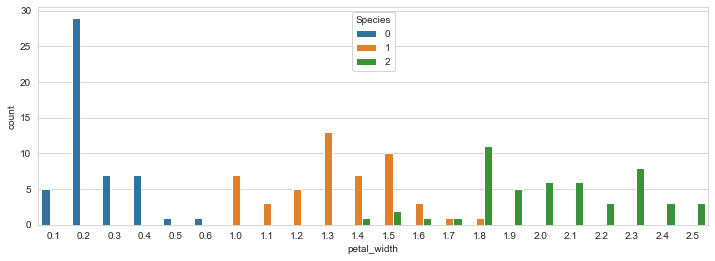

In [186]:
#下記の分析方法が記載されている
#http://www.tsjshg.info/udemy/Lec80-81.html


#sepal_lengthとpetal_lengthを用いると、多値分類に役立ちそうに見える。
from sklearn import linear_model
sns.set_style('whitegrid')
sns.pairplot(iris_df, hue='Species',size=2);
plt.show()

plt.figure(figsize=(12,4))
sns.countplot('sepal_length',data=iris_df,hue='Species')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot('sepal_width',data=iris_df,hue='Species')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot('petal_length',data=iris_df,hue='Species')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot('petal_width',data=iris_df,hue='Species')
plt.show()

In [236]:
iris_df2 =iris_df.loc[:, ['sepal_length','petal_length', 'Species']]

print(iris_df2)
print(type(iris_df2))

     sepal_length  petal_length  Species
0             5.1           1.4        0
1             4.9           1.4        0
2             4.7           1.3        0
3             4.6           1.5        0
4             5.0           1.4        0
..            ...           ...      ...
145           6.7           5.2        2
146           6.3           5.0        2
147           6.5           5.2        2
148           6.2           5.4        2
149           5.9           5.1        2

[150 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [298]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(np.array(iris_df.iloc[:, [0, 2]]), 
                                                    np.array(iris_df.iloc[:,[4]]), train_size = 0.75, random_state = 0)

In [299]:
sc2 = StandardScaler()
X_std2 = sc2.fit_transform(X_train3)

#検証用のデータにtransformを行います。
X_test_std2 = sc2.transform(X_test3)

#reshapeしないと進まない
y_train3 = y_train3.reshape(-1)

accuracy = 0.9473684210526315
precision = 0.9473684210526315
recall = 0.9473684210526315
f1 score = 0.9473684210526315
confusion matrix = 
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


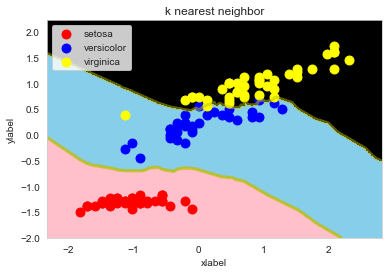

In [300]:
# 最近傍法
knc3 = KNeighborsClassifier()
#学習
knc3.fit(X_std2, y_train3)
#推定
Y_pre1 = knc3.predict(X_test_std2)

#評価
print('accuracy = {}'.format(accuracy_score(y_test3, Y_pre1)))
print('precision = {}'.format(precision_score(y_test3, Y_pre1, average ='micro')))
print('recall = {}'.format(recall_score(y_test3, Y_pre1, average ='micro')))
print('f1 score = {}'.format(f1_score(y_test3, Y_pre1, average ='micro')))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test3, Y_pre1)))

#可視化
def decision_region(X, y, model, step=0.01, title='k nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue', 'black']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std2, y_train3,  knc3)

accuracy = 0.9473684210526315
precision = 0.9473684210526315
recall = 0.9473684210526315
f1 score = 0.9473684210526315
confusion matrix = 
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


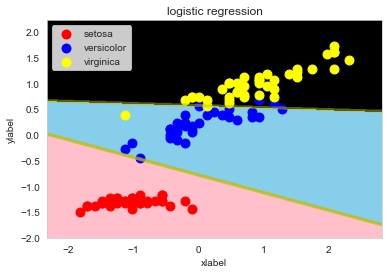

In [310]:
# ロジスティック回帰
lr3 = LogisticRegression()
#学習
lr3.fit(X_std2, y_train3)
#推定
Y_pre2 = lr3.predict(X_test_std2)

#評価
print('accuracy = {}'.format(accuracy_score(y_test3, Y_pre2)))
print('precision = {}'.format(precision_score(y_test3, Y_pre2, average ='micro')))
print('recall = {}'.format(recall_score(y_test3, Y_pre2, average ='micro')))
print('f1 score = {}'.format(f1_score(y_test3, Y_pre2, average ='micro')))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test3, Y_pre2)))

#可視化
def decision_region(X, y, model, step=0.01, title='logistic regression', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue', 'black']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std2, y_train3,  lr3)

accuracy = 0.9473684210526315
precision = 0.9473684210526315
recall = 0.9473684210526315
f1 score = 0.9473684210526315
confusion matrix = 
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


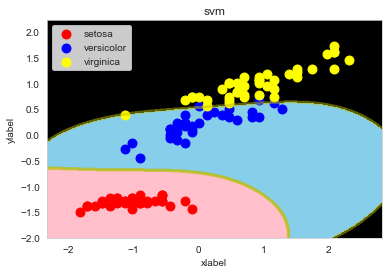

In [315]:
#SVM
svc3 = SVC()
#学習
svc3.fit(X_std2, y_train3)
#推定
Y_pre3 = svc3.predict(X_test_std2)

#評価
print('accuracy = {}'.format(accuracy_score(y_test3, Y_pre3)))
print('precision = {}'.format(precision_score(y_test3, Y_pre3, average ='micro')))
print('recall = {}'.format(recall_score(y_test3, Y_pre3, average ='micro')))
print('f1 score = {}'.format(f1_score(y_test3, Y_pre3, average ='micro')))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test3, Y_pre3)))

#可視化
def decision_region(X, y, model, step=0.01, title='svm', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue', 'black']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std2, y_train3,  svc3)

accuracy = 0.8947368421052632
precision = 0.8947368421052632
recall = 0.8947368421052632
f1 score = 0.8947368421052632
confusion matrix = 
[[13  0  0]
 [ 0 14  2]
 [ 0  2  7]]


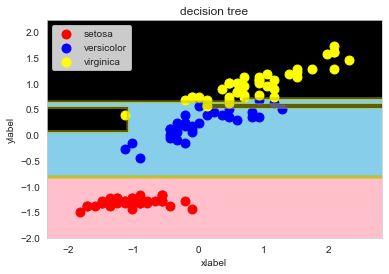

In [317]:
#決定木
tree3 = tree.DecisionTreeClassifier()
#学習
tree3.fit(X_std2, y_train3)
#推定
Y_pre4 = tree3.predict(X_test_std2)

#評価
print('accuracy = {}'.format(accuracy_score(y_test3, Y_pre4)))
print('precision = {}'.format(precision_score(y_test3, Y_pre4, average ='micro')))
print('recall = {}'.format(recall_score(y_test3, Y_pre4, average ='micro')))
print('f1 score = {}'.format(f1_score(y_test3, Y_pre4, average ='micro')))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test3, Y_pre4)))

#可視化
def decision_region(X, y, model, step=0.01, title='decision tree', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue', 'black']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std2, y_train3,  tree3)

accuracy = 0.9210526315789473
precision = 0.9210526315789473
recall = 0.9210526315789473
f1 score = 0.9210526315789473
confusion matrix = 
[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


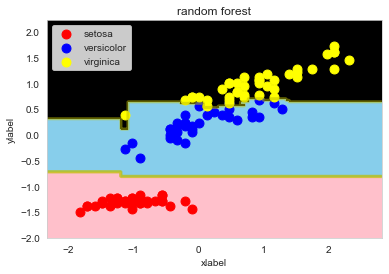

In [312]:
#ランダムフォレスト
rfc3 = RFC()
#学習
rfc3.fit(X_std2, y_train3)
#推定
Y_pre5 = rfc3.predict(X_test_std2)

#評価
print('accuracy = {}'.format(accuracy_score(y_test3, Y_pre5)))
print('precision = {}'.format(precision_score(y_test3, Y_pre5, average ='micro')))
print('recall = {}'.format(recall_score(y_test3, Y_pre5, average ='micro')))
print('f1 score = {}'.format(f1_score(y_test3, Y_pre5, average ='micro')))
print('confusion matrix = \n{}'.format(confusion_matrix(y_test3, Y_pre5)))

#可視化
def decision_region(X, y, model, step=0.01, title='random forest', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue', 'black']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_std2, y_train3,  rfc3)

### 考察

- 多値分類での手法は、評価指標と決定領域も鑑みて、最近傍法と、ロジスティック回帰が適している。全体を通しても、ロジスティック回帰をまず学習手法として取り入れるのが今のところ最適なように思える。